# Utangulizi wa Uwezekano na Takwimu  
Katika daftari hili, tutachunguza baadhi ya dhana ambazo tumejadili hapo awali. Dhana nyingi za uwezekano na takwimu zimewakilishwa vyema katika maktaba kuu za usindikaji wa data katika Python, kama `numpy` na `pandas`.  


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Mabadiliko ya Nasibu na Usambazaji  
Tuanze kwa kuchora sampuli ya thamani 30 kutoka kwenye usambazaji wa sare kati ya 0 na 9. Pia tutahesabu wastani na tofauti.  


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Ili kukadiria kwa macho ni thamani ngapi tofauti zipo kwenye sampuli, tunaweza kuchora **histogramu**:


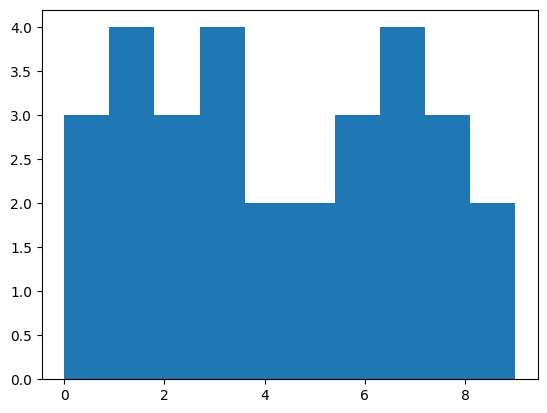

In [119]:
plt.hist(sample)
plt.show()

## Kuchambua Data Halisi

Wastani na tofauti ni muhimu sana wakati wa kuchambua data halisi. Hebu tupakie data kuhusu wachezaji wa baseball kutoka [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


Tunatumia kifurushi kinachoitwa [**Pandas**](https://pandas.pydata.org/) hapa kwa uchambuzi wa data. Tutazungumzia zaidi kuhusu Pandas na kufanya kazi na data katika Python baadaye kwenye kozi hii.

Hebu tukokotoe wastani wa thamani za umri, urefu, na uzito:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Sasa hebu tuzingatie urefu, na tukokotoe upotofu wa kawaida na tofauti:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Mbali na wastani, inafaa kuangalia thamani ya kati na robo. Zinaweza kuonyeshwa kwa kutumia **mchoro wa kisanduku**:


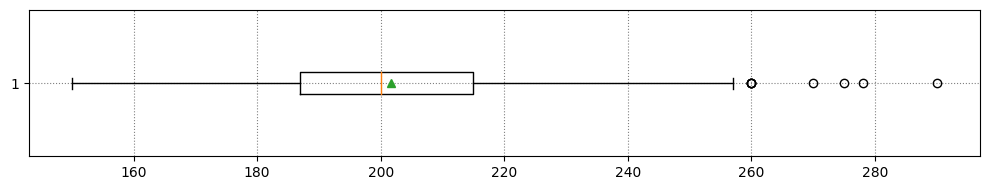

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Tunaweza pia kutengeneza grafu za sanduku za sehemu ndogo za seti yetu ya data, kwa mfano, zilizopangwa kulingana na jukumu la mchezaji.


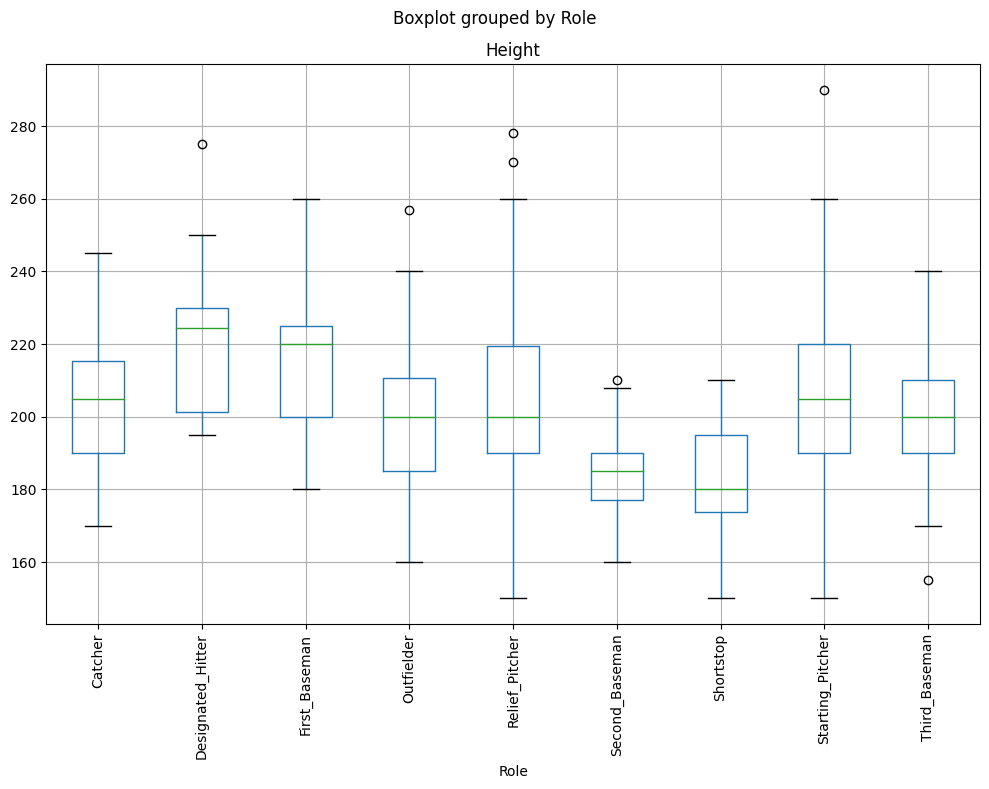

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Kumbuka**: Mchoro huu unapendekeza kwamba, kwa wastani, urefu wa wachezaji wa kwanza wa msingi ni mrefu zaidi kuliko urefu wa wachezaji wa pili wa msingi. Baadaye tutajifunza jinsi tunavyoweza kujaribu dhana hii kwa njia rasmi zaidi, na jinsi ya kuonyesha kwamba data yetu ina umuhimu wa takwimu kuthibitisha hilo.  

Umri, urefu, na uzito vyote ni vigezo endelevu vya nasibu. Unadhani usambazaji wao ukoje? Njia nzuri ya kugundua ni kuchora histogramu ya thamani:


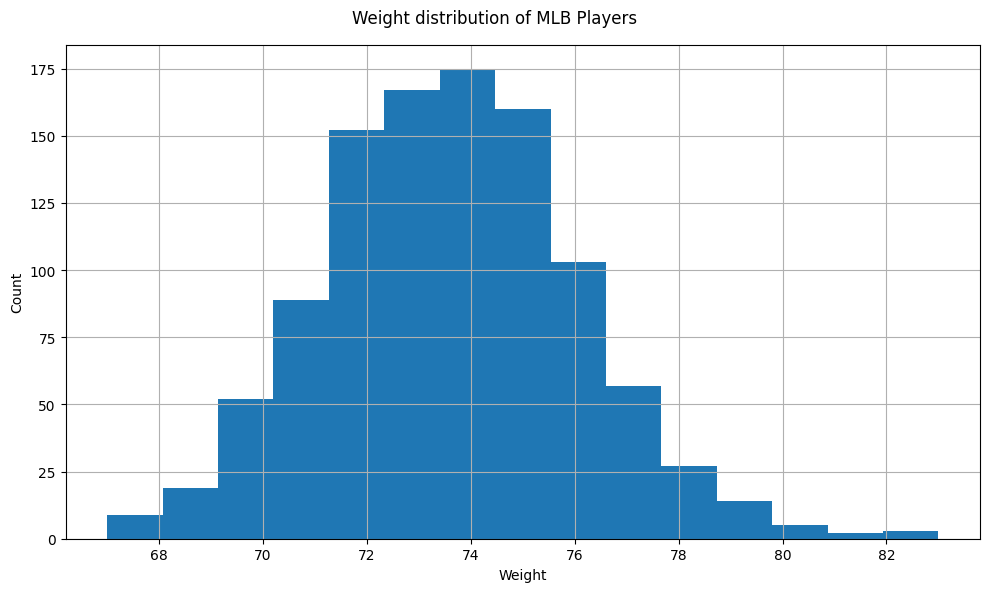

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Usambazaji wa Kawaida

Hebu tuunde sampuli bandia ya uzito inayofuata usambazaji wa kawaida ikiwa na wastani na tofauti sawa na data yetu halisi:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

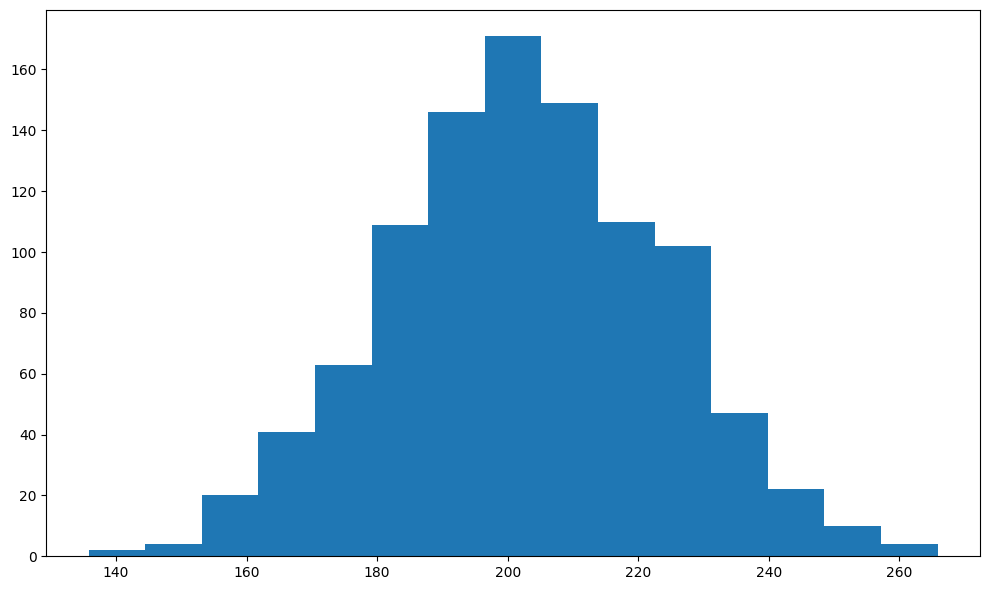

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

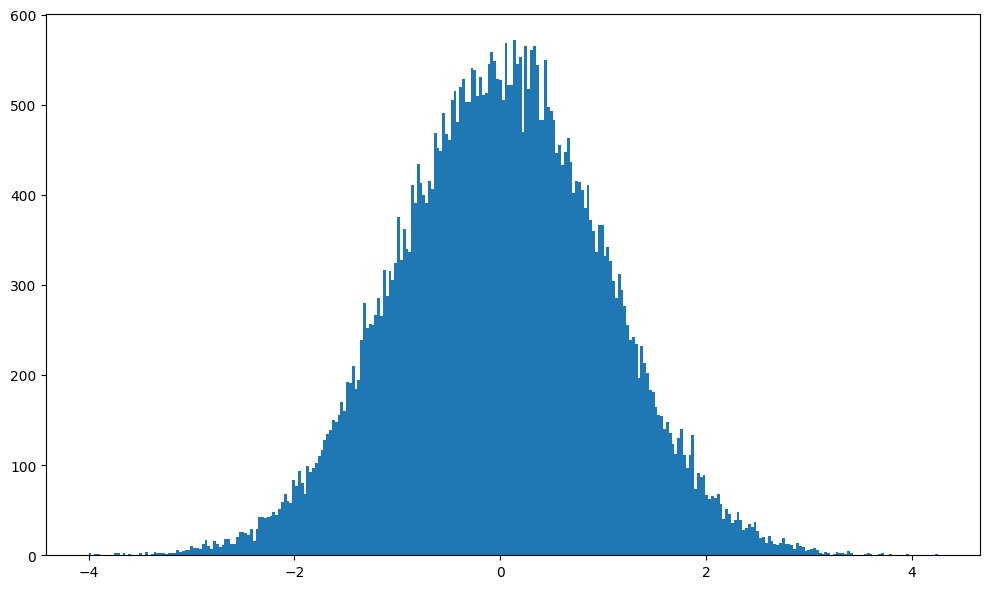

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Kwa kuwa thamani nyingi katika maisha halisi zinasambazwa kawaida, hatupaswi kutumia jenereta ya nambari za bahati nasibu za sare ili kuzalisha data ya sampuli. Hivi ndivyo kinachotokea tukijaribu kuzalisha uzito kwa usambazaji wa sare (uliotengenezwa na `np.random.rand`):


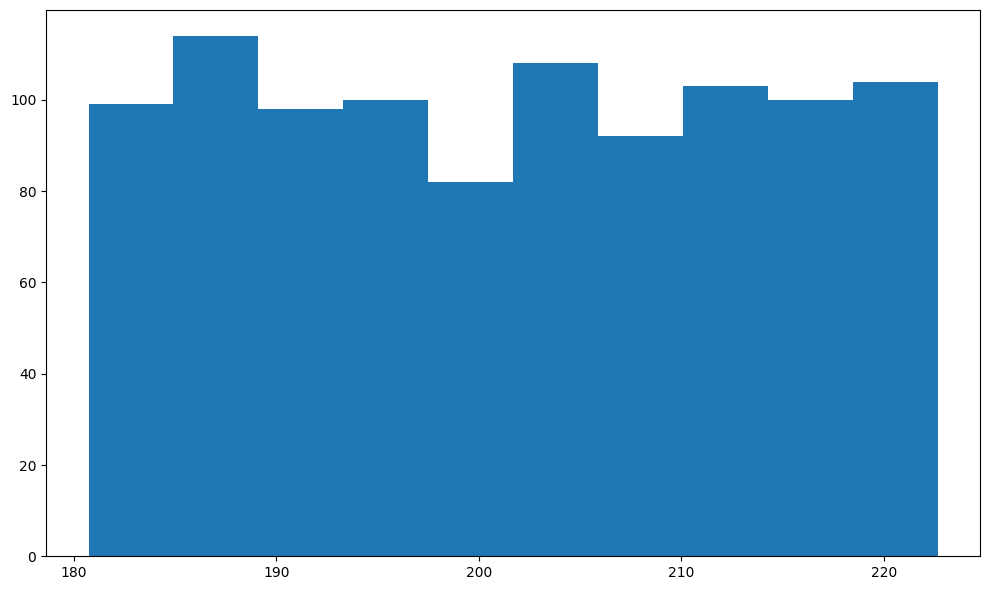

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Vipindi vya Uhakika

Sasa hebu tuhisi vipindi vya uhakika kwa uzito na urefu wa wachezaji wa baseball. Tutatumia msimbo [kutoka kwenye mjadala huu wa stackoverflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Kupima Dhana

Tuchunguze majukumu mbalimbali katika seti yetu ya data ya wachezaji wa baseball:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Tunaweza kuona kwamba vipindi havigongani.

Njia sahihi zaidi ya kuthibitisha dhana hii kwa njia ya takwimu ni kutumia **Student t-test**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Thamani mbili zinazorejeshwa na kazi ya `ttest_ind` ni:  
* p-value inaweza kuchukuliwa kama uwezekano wa usambazaji mbili kuwa na wastani sawa. Katika hali yetu, ni ndogo sana, ikimaanisha kuna ushahidi mkubwa unaounga mkono kwamba wachezaji wa kwanza wa msingi ni warefu zaidi.  
* t-value ni thamani ya kati ya tofauti ya wastani iliyonormalishwa ambayo hutumika katika t-test, na inalinganishwa na thamani ya kizingiti kwa thamani fulani ya kujiamini.  


## Kusimulia Usambazaji wa Kawaida kwa Kutumia Nadharia ya Kikomo cha Kati

Kizalishaji cha nambari za kubahatisha katika Python kimeundwa kutupatia usambazaji wa sare. Ikiwa tunataka kuunda kizalishaji cha usambazaji wa kawaida, tunaweza kutumia nadharia ya kikomo cha kati. Ili kupata thamani inayosambazwa kawaida, tutahesabu wastani wa sampuli iliyozalishwa kwa sare.


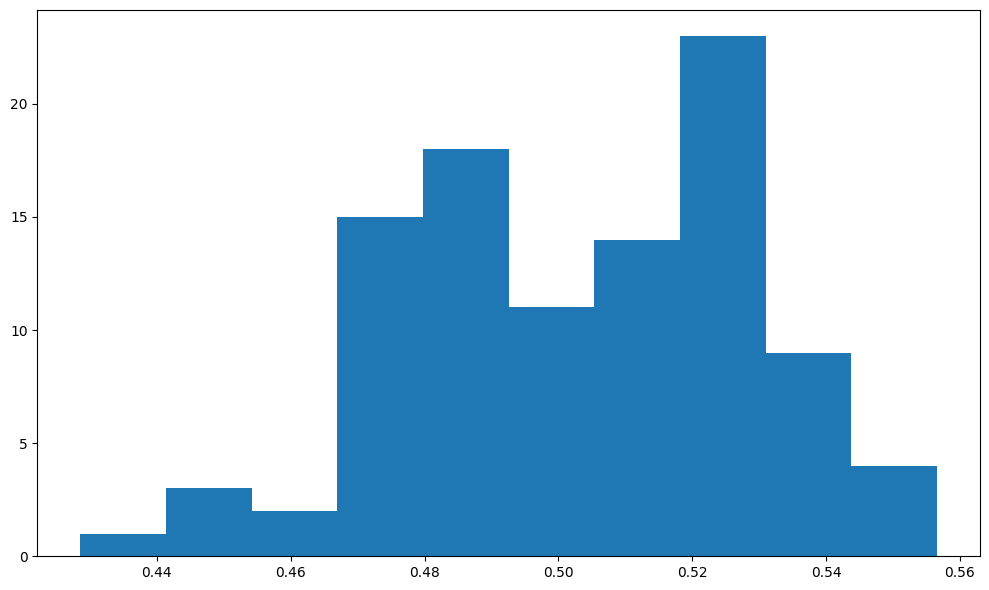

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Uhusiano na Kampuni ya Baseball Mbaya

Uhusiano hutuwezesha kupata mahusiano kati ya mfuatano wa data. Katika mfano wetu wa kuchezea, hebu tufikirie kuna kampuni mbaya ya baseball inayolipa wachezaji wake kulingana na urefu wao - mchezaji akiwa mrefu zaidi, ndivyo anavyopata pesa zaidi. Tuseme kuna mshahara wa msingi wa $1000, na bonasi ya ziada kutoka $0 hadi $100, kulingana na urefu. Tutachukua wachezaji halisi kutoka MLB, na kuhesabu mishahara yao ya kufikirika:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Hebu sasa tukokotoe kovarians na uhusiano wa mfuatano huo. `np.cov` itatupa kinachoitwa **matriki ya kovarians**, ambayo ni upanuzi wa kovarians kwa vigezo vingi. Kipengele $M_{ij}$ cha matriki ya kovarians $M$ ni uhusiano kati ya vigezo vya ingizo $X_i$ na $X_j$, na thamani za diagonal $M_{ii}$ ni tofauti ya $X_{i}$. Vivyo hivyo, `np.corrcoef` itatupa **matriki ya uhusiano**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


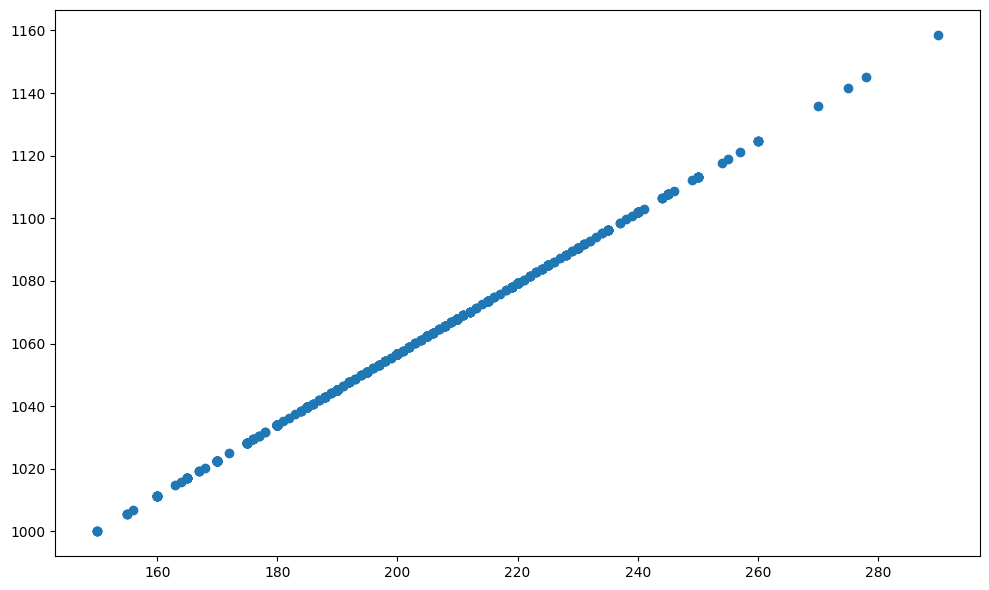

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


Katika kesi hii, uhusiano ni mdogo kidogo, lakini bado uko juu sana. Sasa, ili kufanya uhusiano usiwe dhahiri zaidi, tunaweza kutaka kuongeza nasibu fulani kwa kuongeza kigezo fulani cha nasibu kwenye mshahara. Hebu tuone kinachotokea:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


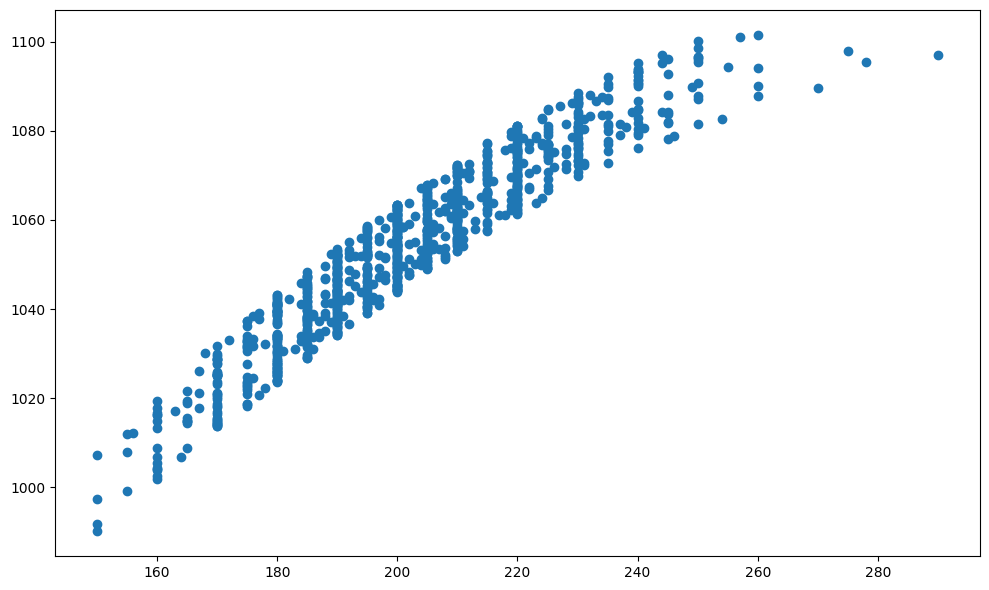

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Je, unaweza kukisia kwa nini nukta zinajipanga katika mistari ya wima kama hii?

Tumetazama uhusiano kati ya dhana iliyotengenezwa kama mshahara na kipimo kilichotazamwa *urefu*. Hebu tuone pia kama vipimo viwili vilivyotazamwa, kama vile urefu na uzito, vina uhusiano pia:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Kwa bahati mbaya, hatukupata matokeo yoyote - ni baadhi tu ya thamani za ajabu `nan`. Hii ni kwa sababu baadhi ya thamani katika mfululizo wetu hazijafafanuliwa, zikiwa zimewakilishwa kama `nan`, jambo ambalo husababisha matokeo ya operesheni pia kuwa hayajafafanuliwa. Kwa kuangalia matriki tunaweza kuona kwamba `Weight` ni safu yenye tatizo, kwa sababu uhusiano wa ndani kati ya thamani za `Height` tayari umehesabiwa.

> Mfano huu unaonyesha umuhimu wa **kuandaa data** na **kusafisha data**. Bila data sahihi hatuwezi kuhesabu chochote.

Hebu tutumie mbinu ya `fillna` kujaza thamani zilizokosekana, na kuhesabu uhusiano:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

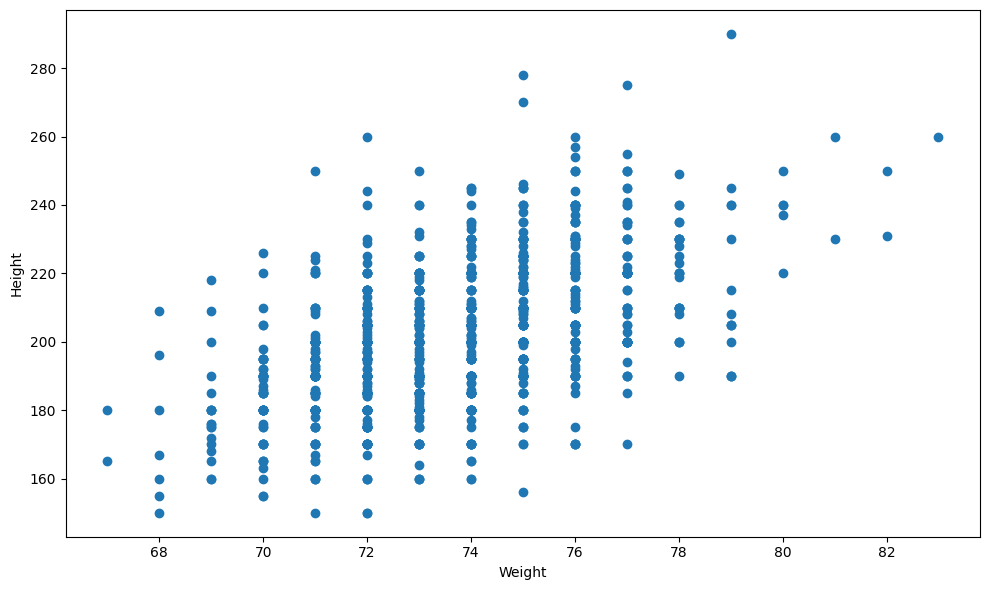

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Hitimisho

Katika daftari hili tumejifunza jinsi ya kufanya shughuli za msingi kwenye data ili kuhesabu kazi za takwimu. Sasa tunajua jinsi ya kutumia mbinu thabiti za hisabati na takwimu kuthibitisha baadhi ya dhana, na jinsi ya kuhesabu viwango vya kujiamini kwa mabadiliko yoyote tukipewa sampuli ya data.



---

**Kanusho**:  
Hati hii imetafsiriwa kwa kutumia huduma ya tafsiri ya AI [Co-op Translator](https://github.com/Azure/co-op-translator). Ingawa tunajitahidi kuhakikisha usahihi, tafadhali fahamu kuwa tafsiri za kiotomatiki zinaweza kuwa na makosa au kutokuwa sahihi. Hati ya asili katika lugha yake ya awali inapaswa kuzingatiwa kama chanzo cha mamlaka. Kwa taarifa muhimu, inashauriwa kutumia huduma ya tafsiri ya kibinadamu ya kitaalamu. Hatutawajibika kwa maelewano mabaya au tafsiri zisizo sahihi zinazotokana na matumizi ya tafsiri hii.
